# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.


In [23]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

> Using the HTML magic command to render tables with grid/borders to facilitate easy viewing.


In [24]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px black solid !important;
    color: black !important;
}

The files were gathered through the alternative option provided - downloading resources directly from the classroom.

In [25]:
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

In [26]:
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

In [27]:
with open('tweet_json.txt') as file:
    data = [json.loads(line) for line in open ('tweet_json.txt', 'r')]
df=pd.DataFrame(data)

In [28]:
with open('tweet_json.txt') as file:
    data = file.readline() 
    data = []
    for lines in file:
        data.append(json.loads(lines))
tweet_json = pd.DataFrame(data)            


In [29]:
tweet_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 00:08:17 +0000 2017,891087950875897856,891087950875897856,Here we have a majestic great white breaching ...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,20562,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2348,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2349,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,False,False,en,NaN,NaN,NaN,NaN
2351,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,False,False,en,NaN,NaN,NaN,NaN


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [30]:
# TWITTER ARCHIVE
# Show random sample of dataset for visual assessment

twitter_archive.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1855,675531475945709568,NaN,NaN,2015-12-12 04:23:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ellie AKA Queen Slayer of the Orbs. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675531475...,10,10,Ellie,None,None,None,None
1272,709225125749587968,NaN,NaN,2016-03-14 03:50:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walker. He's a Butternut Khalifa. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709225125...,11,10,Walker,None,None,None,None
729,781955203444699136,NaN,NaN,2016-09-30 20:33:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chipson. He weighed in at .3 ounces an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781955203...,11,10,Chipson,None,None,None,None
1145,727175381690781696,NaN,NaN,2016-05-02 16:38:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Karll. He just wants to go kayaking. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727175381...,10,10,Karll,None,None,None,None


In [31]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [32]:
# Checking if there is any duplicated tweet_id
# ...No duplicate tweet_id

twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [33]:
#TWEET JSON
# Conduct visual assessment

tweet_json.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN


In [34]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353 entries, 0 to 2352
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2353 non-null   object 
 1   id                             2353 non-null   int64  
 2   id_str                         2353 non-null   object 
 3   full_text                      2353 non-null   object 
 4   truncated                      2353 non-null   bool   
 5   display_text_range             2353 non-null   object 
 6   entities                       2353 non-null   object 
 7   extended_entities              2072 non-null   object 
 8   source                         2353 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [36]:
# As shown above, there are too many columns in the tweet_json table.
# So we'll create a new dataframe -new_tweet_json- with the columns that we are likely to use.

list_df = []

with open('tweet_json.txt', 'r') as lines:
    for line in lines:
        data = json.loads(line)
        tweet_id = data['id']
        full_text = data['full_text']
        favorite_count = data['favorite_count'] 
        retweet_count = data['retweet_count']
        lang = data['lang']
        
        # appending to the list created
        list_df.append({'tweet_id': tweet_id,
                        'full_text': full_text,
                        'favorite_count': favorite_count,
                        'retweet_count': retweet_count,
                       'lang': lang})
        
# Loading the tweet_json data into df_tweet_json        
new_tweet_json = pd.DataFrame(list_df, columns= ['tweet_id', 'full_text', 'favorite_count', 'retweet_count', 'lang'])

In [37]:
new_tweet_json.sample(4)

,tweet_id,full_text,favorite_count,retweet_count,lang
175,857746408056729600,Meet Thor. He doesn't have finals because he's...,36021,11524,en
1612,685307451701334016,Say hello to Petrick. He's an Altostratus Floo...,2262,496,en
683,788178268662984705,Atlas is back and this time he's got doggles. ...,8100,2488,en
830,768596291618299904,Say hello to Oakley and Charlie. They're convi...,5592,1473,en


In [38]:
new_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   full_text       2354 non-null   object
 2   favorite_count  2354 non-null   int64 
 3   retweet_count   2354 non-null   int64 
 4   lang            2354 non-null   object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


In [39]:
#IMAGE PREDICTIONS
# Conduct visual assessment
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [40]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [41]:
# No duplicate rows in tweet_id column of image_prediction table as well
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [42]:
# More overview/checks here show unusual values (outliers) for rating_numerator & rating_denominator with the max markedly greater than the respective means.

twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [43]:
#Checking for denominator not equals to 10 #twitter_archive
denominator_check = twitter_archive[twitter_archive.rating_denominator != 10].rating_denominator
denominator_check

313       0
342      15
433      70
516       7
784      11
902     150
1068     11
1120    170
1165     20
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1598     20
1634    130
1635    110
1662     11
1663     16
1779    120
1843     80
2335      2
Name: rating_denominator, dtype: int64

In [44]:
# The next two cells will group the data above into 2: values less than 10, and those greater than 10 to have a clarity about the values we're dealing with.

# Values less than 10
denominator_less = twitter_archive[twitter_archive.rating_denominator < 10].rating_denominator
denominator_less.value_counts()

0    1
7    1
2    1
Name: rating_denominator, dtype: int64

In [45]:
# ...values greater than 10
denominator_more = twitter_archive[twitter_archive.rating_denominator > 13].rating_denominator
denominator_more.value_counts()

50     3
20     2
80     2
15     1
70     1
150    1
170    1
90     1
40     1
130    1
110    1
16     1
120    1
Name: rating_denominator, dtype: int64

In [46]:
# For numerator, we'll watch out for values that are markedly greater than the column mean (approximately 13, with a cap at 20)
numerator_check = twitter_archive[twitter_archive.rating_numerator > 20].rating_numerator
numerator_check.value_counts()

420     2
75      2
99      1
144     1
26      1
121     1
143     1
44      1
60      1
45      1
80      1
50      1
666     1
204     1
1776    1
165     1
27      1
24      1
84      1
960     1
182     1
88      1
Name: rating_numerator, dtype: int64

### Assess

### Quality issues


_twitter archive_
 
1. Retweet rows will not be needed.

2. Too many nulls, (78/2356 for `in_reply_to_status_id` & `in_reply_to_user_id` ) as well as `retweeted_status_id` & `retweeted_status_user_id` (181/2356 each).
   These columns, along with other columns that are not relevant to our analysis will be dropped.


3. `Timestamp` is object datatype instead of datetime


4. Some values in the `rating_denominator` columns do not fall within/conform to an acceptable range. 
23 instances of denominator having values less than or greater than 10.


5. The columns `rating_numerator` and `rating_denominator` are rendered as object data type instead of integer. This will make it hard to run numerical operations on it if the need arises.

6. Abnormal values in `rating numerator`.


7. `Tweet_id` is in integer form in several tables. 


 _image prediction_
 
8. Column names are not very descriptive especially in the `image_prediction` dataset.


 _tweet json_
 
9. `lang` column is object instead of category

### Tidiness issues
10. A (prospective) single columns `stages` spread across 4  columns (`doggo`, `floofer`, `pupper`, `puppo`)



11. One unit is in separate tables (`image_predictions`, `tweet_json` and `twitter_archive`)  instead of one.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [47]:
# Make copies of original data

copy_twitter_archive = twitter_archive.copy()
copy_tweet_json = new_tweet_json.copy()
copy_image_predictions = image_predictions.copy()

## POSSIBLE ISSUES/ FRAMEWORKS


### Quality
_twitter archive_
 
1. Retweet rows will not be needed.

2. Too many nulls, (78/2356 for `in_reply_to_status_id` & `in_reply_to_user_id` ) as well as `retweeted_status_id` & `retweeted_status_user_id` (181/2356 each).
   These columns, along with other columns that are not relevant to our analysis will be dropped.


3. `Timestamp` is object datatype instead of datetime


4. Some values in the `rating_denominator` columns do not fall within/conform to an acceptable range. 
23 instances of denominator having values less than or greater than 10.


5. The columns `rating_numerator` and `rating_denominator` are rendered as object data type instead of integer. This will make it hard to run numerical operations on it if the need arises.


6. Abnormal values in `rating numerator`.


7. `Tweet_id` is in integer form in several tables. 


 _image prediction_
 
8. Column names are not very descriptive especially in the `image_prediction` dataset.


 _tweet json_
 
9. `lang` column is object instead of category

### Tidiness
10. A (prospective) single columns `stages` spread across 4  columns (`doggo`, `floofer`, `pupper`, `puppo`)


11. One unit is in separate tables (`image_predictions`, `tweet_json` and `twitter_archive`)  instead of one.


## QUALITY ISSUES

1. 


Retweet rows will not be needed .

__Define:__


Drop rows that are not actual tweets, but retweets.

__Code:__

In [48]:
#identify retweets and pass it into a variable.
retweet_rows = twitter_archive[twitter_archive.retweeted_status_id.notnull()].index.tolist()

In [49]:
#permanently drop rows that are retweets.
twitter_archive.drop(retweet_rows, inplace = True)

__Test:__

In [50]:
#check if they're still rows with retweet data...
twitter_archive[twitter_archive.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


 2. 


Too many nulls, (78/2356 for in_reply_to_status_id & in_reply_to_user_id ) as well as retweeted_status_id & retweeted_status_user_id (181/2356 each). These columns, along with other columns that are not relevant to our analysis will be dropped.

#### Define:
Drop columns (irrelevant/unused) from the twitter archive table

#### Code

In [51]:
# Round up the columns to be dropped into a list
list_array = ['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls']

clean_twitter_archive = copy_twitter_archive.drop(list_array, axis=1)

#### Test

In [52]:
# Check if the column drop has been effected
clean_twitter_archive.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
939,753039830821511168,2016-07-13 01:34:21 +0000,So this just changed my life. 13/10 please enj...,13,10,None,None,None,None,None
868,761750502866649088,2016-08-06 02:27:27 +0000,"RT @dog_rates: ""Tristan do not speak to me wit...",10,10,None,None,None,None,None
81,877201837425926144,2017-06-20 16:29:50 +0000,This is Nelly. He graduated with his dogtorate...,12,10,Nelly,None,None,None,None
876,761004547850530816,2016-08-04 01:03:17 +0000,This is Bo and Ty. Bo eats paper and Ty felt l...,11,10,Bo,None,None,None,None
1776,677961670166224897,2015-12-18 21:20:32 +0000,This is Izzy. She's showing off the dance move...,11,10,Izzy,None,None,None,None


3.

 Timestamp is object datatype instead of datetime

#### Define:
Convert `timestamp` column datatype to datetime object using pandas `to_datetime` method 

#### Code

In [53]:
clean_twitter_archive['timestamp'] = pd.to_datetime(clean_twitter_archive['timestamp'])

#### Test

In [54]:
# Check the datatype of the timestamp column
clean_twitter_archive['timestamp'].dtype

datetime64[ns, UTC]

In [55]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   text                2356 non-null   object             
 3   rating_numerator    2356 non-null   int64              
 4   rating_denominator  2356 non-null   int64              
 5   name                2356 non-null   object             
 6   doggo               2356 non-null   object             
 7   floofer             2356 non-null   object             
 8   pupper              2356 non-null   object             
 9   puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 184.2+ KB


4.


Some values in the `rating_denominator` columns do not fall within/conform to an acceptable range. 

- 23 instances of denominator having values less than or greater than 10 

#### Define:
- Replace odd denominator values with 10.

#### Code

In [56]:
denominator_check = clean_twitter_archive[clean_twitter_archive.rating_denominator != 10].rating_denominator
denominator_check.value_counts()

50     3
11     3
80     2
20     2
120    1
16     1
110    1
130    1
40     1
0      1
90     1
15     1
170    1
150    1
7      1
70     1
2      1
Name: rating_denominator, dtype: int64

In [57]:
# Create a dictionary for values gotten from denominator_check variable, then replace values will nulls
dict_denomm = {0, 2, 7, 11, 15, 16, 20, 40, 50, 70, 80, 90, 110, 120, 130, 150, 170}
clean_twitter_archive.rating_denominator.replace(dict_denomm, np.nan, inplace=True)

In [58]:
# Check for nulls...
sum(clean_twitter_archive.rating_denominator.isnull())

23

In [59]:
#Replace nan with constant denominator, 10.
nan_fill = {np.nan: '10'}
clean_twitter_archive.replace({"rating_denominator": nan_fill}, inplace=True)

#### Test

In [60]:
# nulls replaced with 10. No nulls left
sum(clean_twitter_archive.rating_denominator.isnull())

0

In [61]:
#Just noticed, rating denominator and numerator are not integers. We'll change that next.
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   text                2356 non-null   object             
 3   rating_numerator    2356 non-null   int64              
 4   rating_denominator  2356 non-null   object             
 5   name                2356 non-null   object             
 6   doggo               2356 non-null   object             
 7   floofer             2356 non-null   object             
 8   pupper              2356 non-null   object             
 9   puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 184.2+ KB


5. 


The columns `rating_numerator` and `rating_denominator` are rendered as object data type instead of integer. This will make it hard to run numerical operations on it if the need arises.

### Define:
Use the `.astype()` method to convert object to integer data type.

#### Code

In [62]:
clean_twitter_archive[['rating_numerator']] = clean_twitter_archive[['rating_numerator']].astype('int64')
clean_twitter_archive[['rating_denominator']] = clean_twitter_archive[['rating_denominator']].astype('int64')

#### Test

In [63]:
#the rating_numerator and rating_denominator have been converted to integers.
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   text                2356 non-null   object             
 3   rating_numerator    2356 non-null   int64              
 4   rating_denominator  2356 non-null   int64              
 5   name                2356 non-null   object             
 6   doggo               2356 non-null   object             
 7   floofer             2356 non-null   object             
 8   pupper              2356 non-null   object             
 9   puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 184.2+ KB


6.


Abnormal values in rating numerator.

#### Define:
Use Numpy to replace values (adjuged to be outliers) with the mean __(culled from the df.describe output)__ of the column

#### Code

In [64]:
# Write code into variable, numerator_check, to filter out values considered outliers.
numerator_check = clean_twitter_archive[clean_twitter_archive.rating_numerator > 20].rating_numerator
numerator_check.value_counts()

420     2
75      2
99      1
144     1
26      1
121     1
143     1
44      1
60      1
45      1
80      1
50      1
666     1
204     1
1776    1
165     1
27      1
24      1
84      1
960     1
182     1
88      1
Name: rating_numerator, dtype: int64

In [65]:
# Create a dictionary containing outlier values for numerator_ratings.
dict_numerator = {2, 1}
clean_twitter_archive.rating_numerator.replace(dict_numerator, np.nan, inplace=True)

In [66]:
sum(clean_twitter_archive.rating_numerator.isnull())

18

In [67]:
#Replace nan with the column mean of the raring_numerator column, 13(approximately).
nan_fill = {np.nan: '13'}
clean_twitter_archive.replace({"rating_numerator": nan_fill}, inplace=True)

In [68]:
clean_twitter_archive[['rating_numerator']] = clean_twitter_archive[['rating_numerator']].astype('int64')

#### Test

In [69]:
# nulls replaced with 13. No nulls left
sum(clean_twitter_archive.rating_numerator.isnull())

0

7. 


Tweet_id is in integer form in several tables.

#### Define:
Covert `tweet_id` to string data type (as we won't be conducting numerical operations on it).

#### Code

In [70]:
# Since the numbers that make the tweet_id are not going to be used for calculation or rendering any statistical inference, then it makes sense to store it as a string.
clean_twitter_archive[['tweet_id']] = clean_twitter_archive[['tweet_id']].astype('str')
new_tweet_json[['tweet_id']] = new_tweet_json[['tweet_id']].astype('str')
copy_image_predictions[['tweet_id']] = copy_image_predictions[['tweet_id']].astype('str')

#### Test

In [71]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   text                2356 non-null   object             
 3   rating_numerator    2356 non-null   int64              
 4   rating_denominator  2356 non-null   int64              
 5   name                2356 non-null   object             
 6   doggo               2356 non-null   object             
 7   floofer             2356 non-null   object             
 8   pupper              2356 non-null   object             
 9   puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 184.2+ KB


8. 


Column names are not very descriptive especially in the image_prediction dataset.

**#image_prediction table**

#### Define:
Use the rename function to change some column names to more descriptive ones

#### Code

In [72]:
image_predictions.rename(index = int, columns={"jpg_url" : "image_url"}, inplace = True)
image_predictions.rename(index = int, columns={"p1_conf" : "p1_confidence"}, inplace = True)
image_predictions.rename(index = int, columns={"p2_conf" : "p2_confidence"}, inplace = True)
image_predictions.rename(index = int, columns={"p3_conf" : "p3_confidence"}, inplace = True)
new_tweet_json.rename(index = int, columns={"full_text" : "text"}, inplace = True)


#### Test

In [73]:
image_predictions

,tweet_id,image_url,img_num,p1,p1_confidence,p1_dog,p2,p2_confidence,p2_dog,p3,p3_confidence,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


9. 


`lang` column is object instead of a category datatype

**#tweet_json table**

#### Define:
Use the .astype() method to chang the `lang` column data type from object to category datatype

#### Code

In [74]:
new_tweet_json[['lang']] = new_tweet_json[['lang']].astype('category')

#### Test

In [75]:
new_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   tweet_id        2354 non-null   object  
 1   text            2354 non-null   object  
 2   favorite_count  2354 non-null   int64   
 3   retweet_count   2354 non-null   int64   
 4   lang            2354 non-null   category
dtypes: category(1), int64(2), object(2)
memory usage: 94.6+ KB



## TIDINESS ISSUES

10. 

- A (prospective) single columns `stages` spread across 4  columns (`doggo`, `floofer`, `pupper`, `puppo`)


#### Define:
- Concatenate the 4 columns into a new column `stages`.
- Drop the now redundant 4 columns
- Modify data where necessary/relevant

#### Code

In [76]:
#concatenate the four columns
clean_twitter_archive['stage'] = clean_twitter_archive.doggo + clean_twitter_archive.floofer + clean_twitter_archive.pupper + clean_twitter_archive.puppo

clean_twitter_archive['stage'].value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stage, dtype: int64

In [77]:
#drop redundant columns
d_stages = ['doggo', 'floofer', 'pupper', 'puppo']
clean_twitter_archive.drop(d_stages, axis=1, inplace=True)

In [78]:
clean_twitter_archive

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NoneNoneNoneNone
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,NoneNoneNoneNone
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NoneNoneNoneNone
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NoneNoneNoneNone
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,NoneNoneNoneNone
...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,NoneNoneNoneNone
2352,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,NoneNoneNoneNone
2353,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,9,10,a,NoneNoneNoneNone
2354,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,7,10,a,NoneNoneNoneNone


In [79]:
#modify and strip instances of string, 'None'.
clean_twitter_archive['stage'] = clean_twitter_archive['stage'].map(lambda find:
find.replace("None", ""))

clean_twitter_archive['stage'].value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

In [80]:
# It was stated in dataset description that it is possible to have a dog exhibit 
# characteristics of two dog stages. These instances will be separeted using a comma.

clean_twitter_archive.loc[clean_twitter_archive.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
clean_twitter_archive.loc[clean_twitter_archive.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
clean_twitter_archive.loc[clean_twitter_archive.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

clean_twitter_archive['stage'].value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

#### Test

In [81]:
#check components of the column
pd.unique(clean_twitter_archive['stage'])

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

11. 


- One unit is in separate tables (`image_predictions`, `tweet_json` and `twitter_archive`)  instead of one.

In [82]:
#merge clean_twitter_archive and new_tweet_json, call new variable 'merge_1'
clean_twitter_archive = pd.merge(clean_twitter_archive , new_tweet_json,
                            on=['tweet_id'], how='inner')


In [83]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2354 non-null   object             
 1   timestamp           2354 non-null   datetime64[ns, UTC]
 2   text_x              2354 non-null   object             
 3   rating_numerator    2354 non-null   int64              
 4   rating_denominator  2354 non-null   int64              
 5   name                2354 non-null   object             
 6   stage               2354 non-null   object             
 7   text_y              2354 non-null   object             
 8   favorite_count      2354 non-null   int64              
 9   retweet_count       2354 non-null   int64              
 10  lang                2354 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 205.0+ KB


In [84]:
#next, add image prediction table to the merge to form a tentatative 'master.csv' file called twitter_archive_master.

#briefly render tweet_id as 'int' to facilitate merge
clean_twitter_archive[['tweet_id']] = clean_twitter_archive[['tweet_id']].astype('int64')
twitter_archive_master = pd.merge(clean_twitter_archive , image_predictions,
                            on=['tweet_id'], how='left')

In [85]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2354 non-null   int64              
 1   timestamp           2354 non-null   datetime64[ns, UTC]
 2   text_x              2354 non-null   object             
 3   rating_numerator    2354 non-null   int64              
 4   rating_denominator  2354 non-null   int64              
 5   name                2354 non-null   object             
 6   stage               2354 non-null   object             
 7   text_y              2354 non-null   object             
 8   favorite_count      2354 non-null   int64              
 9   retweet_count       2354 non-null   int64              
 10  lang                2354 non-null   category           
 11  image_url           2073 non-null   object             
 12  img_num             2073 non-null 

In [86]:
twitter_archive_master.head()

,tweet_id,timestamp,text_x,rating_numerator,rating_denominator,name,stage,text_y,favorite_count,retweet_count,...,img_num,p1,p1_confidence,p1_dog,p2,p2_confidence,p2_dog,p3,p3_confidence,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,This is Phineas. He's a mystical boy. Only eve...,39467,8853,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,,This is Tilly. She's just checking pup on you....,33819,6514,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,This is Archie. He is a rare Norwegian Pouncin...,25461,4328,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,,This is Darla. She commenced a snooze mid meal...,42908,8964,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,,This is Franklin. He would like you to stop ca...,41048,9774,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Trim final dataframe
- Drop columns/rows.
- Rename columns.
- Select appropriate datatypes.


In [87]:
#drop columns
trim = ['image_url', 'p2', 'p2_confidence', 'p2_dog', 'p3', 'p3_confidence', 'p3_dog']
twitter_archive_master = twitter_archive_master.drop(trim, axis=1)

#twitter_archive_master.drop("stage", axis=1, inplace=True)

In [88]:
#rename columns
twitter_archive_master.rename(index = int, columns={"img_num" : "number_of_images"}, inplace = True)
twitter_archive_master.rename(index = int, columns={"p1" : "dog_breed"}, inplace = True)
twitter_archive_master.rename(index = int, columns={"p1_confidence" : "prediction_confidence"}, inplace = True)
twitter_archive_master.rename(index = int, columns={"p1_dog" : "is_dog"}, inplace = True)

In [89]:
#drop rows
twitter_archive_master["is_dog"].replace(False, np.nan, inplace=True)
twitter_archive_master.is_dog.dropna(inplace=True)

In [90]:
#select appropriate datatypes
twitter_archive_master['timestamp'] = pd.to_datetime(twitter_archive_master['timestamp'])

In [91]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2354 non-null   int64              
 1   timestamp              2354 non-null   datetime64[ns, UTC]
 2   text_x                 2354 non-null   object             
 3   rating_numerator       2354 non-null   int64              
 4   rating_denominator     2354 non-null   int64              
 5   name                   2354 non-null   object             
 6   stage                  2354 non-null   object             
 7   text_y                 2354 non-null   object             
 8   favorite_count         2354 non-null   int64              
 9   retweet_count          2354 non-null   int64              
 10  lang                   2354 non-null   category           
 11  number_of_images       2073 non-null   float64          

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [92]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. __Which day of the week tend to have the highest tweet engagement?__
> Across retweet counts and favorite counts analysis, Wednesdays appear to see the highest activities on the page. Monday and Tuesday follows closely. This will suggest that Mondays through Wednesdays are the the periods with high engagements. The twitter page can therefore act on this information by either encouraging followers to post during this period, or other find other ways leveraging on this information to drive engagements.

2. __Which dog breed appears most (i.e is most popular) in the WeRateDog twitter page?__
> Golden retriever appear to be the most popular dog breed among followers of the page, since it is the most frequently posted breed by users.

3. __Which dog stages tend to rack up high number of retweets?__
> Dogs that fall within the doggo stage appear to be popular amongst followers, as they have the highest average retweets of the other dog stages.

### Insight 1:
Which day of the week tend to have the highest tweet engagement?

In [93]:
#Use the argument '%A' in string formatter method '.strftime()' to return days of the week (as strings), and then pass it into a column, `day_of_the_weeek`.
twitter_archive_master["day_of_the_week"] = twitter_archive_master["timestamp"].dt.strftime("%A")

In [94]:
#then group day_of_the_week by favorite count and retweet count.
archive_master_insight= twitter_archive_master.groupby(["day_of_the_week"], as_index=False) ["favorite_count", "retweet_count"].sum()

#test (with favorite_count)
archive_master_insight.sort_values(by=["favorite_count"]).head(10)

C:\Users\NELSON\AppData\Local\Temp/ipykernel_9596/1286942292.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  archive_master_insight= twitter_archive_master.groupby(["day_of_the_week"], as_index=False) ["favorite_count", "retweet_count"].sum()


,day_of_the_week,favorite_count,retweet_count
3,Sunday,2357196,864866
2,Saturday,2477944,991830
4,Thursday,2508595,960236
0,Friday,2588285,1030952
5,Tuesday,2846694,1179251
1,Monday,3063019,1116120
6,Wednesday,3180867,1306678


In [95]:
#define a function to create plots that show relationship between days of the week and tweet engagements (favorite counts and retweet counts)
def twt_engagement(engagement_type, day, order):
    input_ = archive_master_insight.sort_values(by=["favorite_count"]).head(10)
    viz = sns.barplot(x=engagement_type, y=day, data=input_, orient='h', color='blue')
    title=plt.title("Tweet Interaction Days Ranking")
    Y=plt.ylabel("{}".format(day))
    X=plt.xlabel("{}".format(engagement_type))
    return input_, viz, title, Y, X

(  day_of_the_week  favorite_count  retweet_count
 3          Sunday         2357196         864866
 2        Saturday         2477944         991830
 4        Thursday         2508595         960236
 0          Friday         2588285        1030952
 5         Tuesday         2846694        1179251
 1          Monday         3063019        1116120
 6       Wednesday         3180867        1306678,
 <AxesSubplot:title={'center':'Tweet Interaction Days Ranking'}, xlabel='favorite_count', ylabel='day_of_the_week'>,
 Text(0.5, 1.0, 'Tweet Interaction Days Ranking'),
 Text(0, 0.5, 'day_of_the_week'),
 Text(0.5, 0, 'favorite_count'))

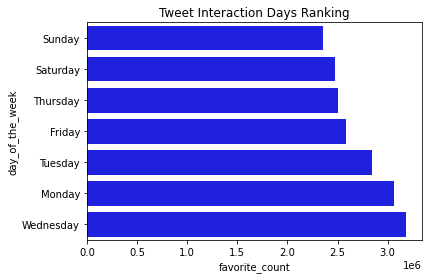

In [96]:
#for favorite counts
twt_engagement('favorite_count', 'day_of_the_week', False)

(  day_of_the_week  favorite_count  retweet_count
 3          Sunday         2357196         864866
 2        Saturday         2477944         991830
 4        Thursday         2508595         960236
 0          Friday         2588285        1030952
 5         Tuesday         2846694        1179251
 1          Monday         3063019        1116120
 6       Wednesday         3180867        1306678,
 <AxesSubplot:title={'center':'Tweet Interaction Days Ranking'}, xlabel='retweet_count', ylabel='day_of_the_week'>,
 Text(0.5, 1.0, 'Tweet Interaction Days Ranking'),
 Text(0, 0.5, 'day_of_the_week'),
 Text(0.5, 0, 'retweet_count'))

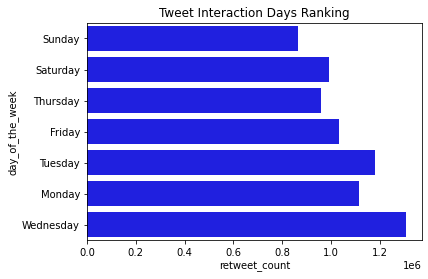

In [97]:
#for retweet cuonts...
twt_engagement('retweet_count', 'day_of_the_week', False)

> __Across retweet counts and favorite counts analysis, Wednesdays appear to see the highest activities on the page. Monday and Tuesday follows closely. This will suggest that Mondays through Wednesdays are the the periods with high engagements. The twitter page can therefore act on this information by either encouraging followers to post during this period, or other find other ways leveraging on this information to drive engagements.__

 

### Insight 2:
Which dog breed appears most (i.e is most popular) in the WeRateDog twitter page?

## MOST POPULAR DOG BREEDS

In [98]:
twitter_archive_master['dog_breed'].value_counts()[0:5]

golden_retriever      150
Labrador_retriever    100
Pembroke               88
Chihuahua              83
pug                    57
Name: dog_breed, dtype: int64

> __Golden retriever appear to be the most popular dog breed among followers of the page, since it is the most frequently posted breed by users.__

 

### Insight 3
Which dog breeds have high number of retweets?

<AxesSubplot:title={'center':'Average retweet counts by stages of dogs'}, xlabel='stages'>

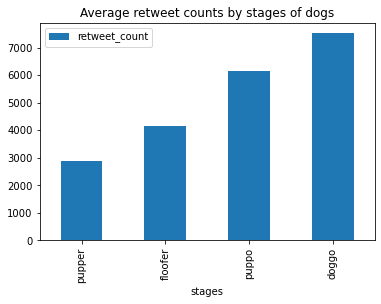

In [99]:
#Call up rows with dog stages (while disregarding instances of null values)
dog_stages = twitter_archive_master[twitter_archive_master["stage"].isnull()==False]

#Query dog stages and find dog stages. Pass it into variable 'category'
category = dog_stages.query('stage=="pupper" or stage=="doggo" or stage=="puppo" or stage=="floofer"' )

category_count = pd.DataFrame(category.groupby('stage').retweet_count.mean().sort_values())
category_count['stages'] = category_count.index
category_count.plot(x="stages", y="retweet_count", kind='bar', title="Average retweet counts by stages of dogs")

> __Dogs that fall within the doggo stage appear to be popular amongst followers, as they have the highest average retweets of the other dog stages.__

 